In [26]:
# Imports
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import json
import re
from collections import Counter
from scipy import stats

Read file for Arnesh

In [27]:
listings_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/listings.csv'
listings_df = pd.read_csv(listings_filepath)

Read file for Abhay

In [28]:
# listings_filepath = '/Users/abhayrakeshdeshmukhmaurya/Library/CloudStorage/OneDrive-UniversityofEdinburgh/CS/University/Year 2/Data Science/CW3/AirBnb/datasets/listings.csv'
# listings_df = pd.read_csv(listings_filepath)

Data Cleaning

In [29]:
# Deleting Unnecessary Columns
columns = ['host_url', 'host_name', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'calendar_updated', 'calendar_last_scraped','picture_url', 'neighbourhood_group_cleansed','license', 'host_location', 'first_review', 'last_review', 'host_thumbnail_url', 'host_picture_url' ]
listings_df.drop(columns=columns, inplace=True)

# Converting columns with (True, False) to (1, 0)
replace_dict = {'instant_bookable':{'t':1, 'f':0}, 
                'host_identity_verified':{'t':1, 'f':0},
                'host_has_profile_pic':{'t':1, 'f':0},
                'host_is_superhost':{'t':1, 'f':0},
                'has_availability':{'t':1, 'f':0}
                }
listings_df = listings_df.replace(replace_dict)

# Removing HTML tags from description
def remove_html_tags(text):
    if pd.isna(text):
        return text
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

listings_df['description'] = listings_df['description'].apply(remove_html_tags)

# Creating parking column and assigning the rows with parking feature
parking_rows = listings_df[(listings_df['name'].str.contains('parking', case=False)) | 
                           (listings_df['amenities'].apply(lambda x: 'parking' in x))]

listings_df['Parking'] = 0
listings_df.loc[parking_rows.index, 'Parking'] = 1

# Creating room_type_num column to store unique types in room_type
room_type_labels, room_type_unique = pd.factorize(listings_df['room_type'])
listings_df['room_type_num'] = room_type_labels

# Removing % symbol 
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.replace('%', '')
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace('%', '')


listings_df.head()




/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_92096/2982240722.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Parking,room_type_num
0,15420.0,Georgian Boutique Apt City Centre,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",60423,06/12/2009,"I have a background in property, having worked...",within a few hours,100,96,...,4.98,4.91,0,1,1,0,0,3.10,1,0
1,707097.0,Centre Royal Mile Apartment 3 bedrooms 2 bathr...,NaN,"The location is the perfect for tourism , shor...",3092851,29/07/2012,Airbnb partner owner . Will do my best to make...,within a day,50,84,...,4.94,4.09,1,8,6,2,0,0.55,1,0
2,728199.0,"Private room in central, spacious and comfy flat",Fantastic main door flat over two levels withi...,"Great location for access to the city centre, ...",3776412,06/10/2012,We are an early/mid 40's couple who love to tr...,within an hour,100,95,...,4.73,4.79,0,1,0,1,0,2.86,1,1
3,732008.0,51 18 Caledonian Crescent,This beautiful third floor apartment is set in...,NaN,3810279,09/10/2012,We are a family run business specialising in h...,within an hour,100,99,...,4.71,4.70,1,2,2,0,0,2.27,1,0
4,744710.0,Refurbished Flat in a Georgian Era Building in...,A stunning apartment in the heart of Edinburgh...,The apartment is in a Central Edinburgh neighb...,3737047,02/10/2012,I'm Gareth and I own and manage this gem of a ...,within an hour,100,100,...,4.96,4.86,1,1,1,0,0,1.73,1,0


Abhay GeoJson File Path

In [30]:
# path = '/Users/abhayrakeshdeshmukhmaurya/Library/CloudStorage/OneDrive-UniversityofEdinburgh/CS/University/Year 2/Data Science/CW3/AirBnb/datasets/neighbourhoods.geojson'

Arnesh GeoJSon File PAth 

In [31]:
path = '/Users/arneshsaha/Desktop/AirBnb/datasets/neighbourhoods.geojson'

In [32]:

# # read the .geojson file
# with open(path) as f:
#     data = json.load(f)

# # create a folium map centered at a specific location
# m = folium.Map(location=[55.9533, -3.1883], zoom_start=12)

# folium.GeoJson(
#     'https://raw.githubusercontent.com/johan/world.geo.json/master/countries/GBR.geo.json',
#     name='geojson'
# ).add_to(m)

# # add the data to the map as a GeoJSON layer
# folium.GeoJson(data).add_to(m)

# sample_df = listings_df.sample(n=50, random_state=42)
# # Add markers for each point in the sampled DataFrame
# for index, row in sample_df.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # display the map in the Jupyter notebook
# m


In [33]:
room_type_dict = {'Entire home/apt': 'Room type: Entire Home', 'Private room': 'Room Type: Private Room', 'Hotel room': 'Room Type: Hotel Room' ,'Shared room': 'Room Type: Shared Room'}
listings_df['room_type'] = listings_df['room_type'].replace(room_type_dict)

In [34]:
dummies = pd.get_dummies(listings_df['room_type'])

# concatenate the dummies DataFrame with the original DataFrame
listings_df = pd.concat([listings_df, dummies], axis=1)
listings_df.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Parking,room_type_num,Room Type: Hotel Room,Room Type: Private Room,Room Type: Shared Room,Room type: Entire Home
0,15420.0,Georgian Boutique Apt City Centre,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",60423,06/12/2009,"I have a background in property, having worked...",within a few hours,100,96,...,1,0,0,3.10,1,0,0,0,0,1
1,707097.0,Centre Royal Mile Apartment 3 bedrooms 2 bathr...,NaN,"The location is the perfect for tourism , shor...",3092851,29/07/2012,Airbnb partner owner . Will do my best to make...,within a day,50,84,...,6,2,0,0.55,1,0,0,0,0,1
2,728199.0,"Private room in central, spacious and comfy flat",Fantastic main door flat over two levels withi...,"Great location for access to the city centre, ...",3776412,06/10/2012,We are an early/mid 40's couple who love to tr...,within an hour,100,95,...,0,1,0,2.86,1,1,0,1,0,0
3,732008.0,51 18 Caledonian Crescent,This beautiful third floor apartment is set in...,NaN,3810279,09/10/2012,We are a family run business specialising in h...,within an hour,100,99,...,2,0,0,2.27,1,0,0,0,0,1
4,744710.0,Refurbished Flat in a Georgian Era Building in...,A stunning apartment in the heart of Edinburgh...,The apartment is in a Central Edinburgh neighb...,3737047,02/10/2012,I'm Gareth and I own and manage this gem of a ...,within an hour,100,100,...,1,0,0,1.73,1,0,0,0,0,1


Question 1

In [35]:
# Deleting columns unnecessary for question1-
quality_df = listings_df
columns =['description', 'neighborhood_overview', 'host_since', 'host_about', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'reviews_per_month']
quality_df.drop(columns=columns, inplace=True)
quality_df.dropna(subset=['host_response_time', 'bedrooms','review_scores_cleanliness', "beds","host_acceptance_rate", "bathrooms_text"], inplace=True)

# Convert variables from host_response_time to int into host_response_time_num column

host_response_time_dict = {'within an hour': 0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3}
quality_df['host_response_time_num'] = quality_df['host_response_time'].map(host_response_time_dict)

quality_df['host_response_rate'] = quality_df['host_response_rate'].astype(float)
quality_df['host_acceptance_rate'] = quality_df['host_acceptance_rate'].astype(float)

# Removing dollar sign from price
quality_df['price'] = quality_df['price'].str.replace(',', '',regex=True).str.replace('$', '',regex=True).astype('float')

# Extract the number from each entry in the 'bathrooms_text' column
quality_df['bathrooms_text'].fillna('0 baths', inplace=True)
quality_df['bathrooms'] = quality_df['bathrooms_text'].apply(lambda x: pd.to_numeric(pd.Series([x]).str.extract(r'(\d+\.?\d*)')[0], errors='coerce').fillna(0).astype('Float64'))
# Dropping 'bathrooms_text"
quality_df.drop(columns=['bathrooms_text'], inplace=True)

# Removing any row with Bathrooms = 0
quality_df = quality_df.drop(quality_df[quality_df['bathrooms'] == 0].index)

quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 7387
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5241 non-null   float64
 1   name                                          5241 non-null   object 
 2   host_id                                       5241 non-null   int64  
 3   host_response_time                            5241 non-null   object 
 4   host_response_rate                            5241 non-null   float64
 5   host_acceptance_rate                          5241 non-null   float64
 6   host_is_superhost                             5241 non-null   float64
 7   host_listings_count                           5241 non-null   int64  
 8   host_total_listings_count                     5241 non-null   int64  
 9   host_has_profile_pic                          5241 non-null   i

In [36]:
# Resetting index to have sequential index

quality_df = quality_df.reset_index().sort_values(by='index')
quality_df = quality_df.drop(columns=['index'])
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5240
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5241 non-null   float64
 1   name                                          5241 non-null   object 
 2   host_id                                       5241 non-null   int64  
 3   host_response_time                            5241 non-null   object 
 4   host_response_rate                            5241 non-null   float64
 5   host_acceptance_rate                          5241 non-null   float64
 6   host_is_superhost                             5241 non-null   float64
 7   host_listings_count                           5241 non-null   int64  
 8   host_total_listings_count                     5241 non-null   int64  
 9   host_has_profile_pic                          5241 non-null   i

Extracting Amenities

In [37]:

def extract_words(x):
    x = x.strip('[]')
    x = x.replace('"', '')
    return x.split(', ')
quality_df['amenities'] = quality_df['amenities'].apply(extract_words)

def extract_strings(row):
    strings = []
    for item in row['amenities']:
        string = re.sub(r'[^\w\s]', '', item)  # remove special characters
        strings.append(string.lower())  # convert to lowercase and append to the list
    return strings

# apply the function to the DataFrame and store the result in a new column
quality_df['amenities'] = quality_df.apply(lambda row: extract_strings(row), axis=1)

amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
counter.most_common()


[('smoke alarm', 5080),
 ('essentials', 4798),
 ('kitchen', 4633),
 ('wifi', 4579),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('iron', 4440),
 ('long term stays allowed', 4361),
 ('hangers', 4305),
 ('hot water', 4272),
 ('dishes and silverware', 4090),
 ('refrigerator', 3966),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('heating', 3506),
 ('microwave', 3420),
 ('shampoo', 3390),
 ('oven', 3068),
 ('washer', 3023),
 ('self checkin', 2737),
 ('tv', 2634),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('stove', 2149),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('free parking on premises', 1666),
 ('drying rack for clothing', 1627),
 ('free street parking', 1574),
 ('coffee maker', 1513),
 ('roo

In [38]:


# Define a function to standardize TV-related amenities
def standardize_amenities(amenities_list, item):
    standardized_amenities = []
    for amenity in amenities_list:
        if item.lower() in amenity.lower():
            standardized_amenities.append(item)
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

# Apply the function to the 'amenities' column
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'balcony'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'backyard'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'soap'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'view'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'oven'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'stove'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'parking'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'wifi'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'tv'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'conditioner'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'shampoo'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'coffee'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'fireplace'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'game'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'crib'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'kitchen'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'chair'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'heating'))

def standardize_refrigerator_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'refrigerator' in amenity.lower() or 'fridge' in amenity.lower() :
            standardized_amenities.append('refrigerator')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_refrigerator_amenities)

def standardize_storage_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'storage' in amenity.lower() or 'closet' in amenity.lower() :
            standardized_amenities.append('storage')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_storage_amenities)

def standardize_washer_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'washer' in amenity.lower() and not 'dishwasher' in amenity.lower() :
            standardized_amenities.append('washer')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_washer_amenities)

def standardize_dryer_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'dryer' in amenity.lower() and not 'hair dryer' in amenity.lower() :
            standardized_amenities.append('dryer')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_dryer_amenities)

amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
counter.most_common()


[('wifi', 5221),
 ('smoke alarm', 5080),
 ('parking', 5048),
 ('heating', 4932),
 ('essentials', 4798),
 ('kitchen', 4709),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('washer', 4455),
 ('iron', 4440),
 ('tv', 4366),
 ('long term stays allowed', 4361),
 ('refrigerator', 4360),
 ('hangers', 4305),
 ('hot water', 4272),
 ('dishes and silverware', 4090),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('coffee', 3637),
 ('oven', 3601),
 ('shampoo', 3545),
 ('microwave', 3420),
 ('stove', 2876),
 ('self checkin', 2737),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('storage', 2249),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('crib', 1675),
 ('view', 1639),
 ('drying rack for clothing', 1627),
 ('drye

In [39]:
def remove_duplicates(lst):
    return list(set(lst))

quality_df['amenities'] = quality_df['amenities'].apply(remove_duplicates)

In [40]:
amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
amenities_ordered = counter.most_common()
counter.most_common()


[('wifi', 5155),
 ('smoke alarm', 5080),
 ('heating', 4921),
 ('essentials', 4798),
 ('kitchen', 4707),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('washer', 4455),
 ('iron', 4440),
 ('long term stays allowed', 4361),
 ('hangers', 4305),
 ('hot water', 4272),
 ('tv', 4238),
 ('refrigerator', 4175),
 ('dishes and silverware', 4090),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('parking', 3801),
 ('oven', 3601),
 ('shampoo', 3543),
 ('microwave', 3420),
 ('stove', 2874),
 ('coffee', 2807),
 ('self checkin', 2737),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('storage', 2112),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('drying rack for clothing', 1627),
 ('dryer', 1619),
 ('soap', 1554),
 ('roo

In [41]:
amenities = quality_df['amenities']
all_amenities = []
for amenity_list in amenities:
    all_amenities +=  amenity_list

# Count the frequency of each amenity
counter = Counter(all_amenities)

# Define a regular expression pattern to extract common types of amenities
s = r'('
for (amenity, count) in counter.most_common():
    if count >450:
        s += amenity
        s += '|'
s = s[:-1]
s += ')'
pattern = re.compile(s)

# Extract common types of amenities from the list of amenities
selected_amenities = []
for amenity_list in amenities:
    selected_amenities.append(pattern.findall(str(amenity_list)))
    
# One hot encoding the selected amenities
encoded_amenities = pd.DataFrame(selected_amenities).stack().str.get_dummies().sum(level=0)

quality_df = pd.concat([quality_df, encoded_amenities], axis = 1)

quality_df.iloc[:, 48:111] = quality_df.iloc[:, 48:111].astype('Int64')

quality_df

/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_92096/515659107.py:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_amenities = pd.DataFrame(selected_amenities).stack().str.get_dummies().sum(level=0)
/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_92096/515659107.py:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  quality_df.iloc[:, 48:111] = quality_df.iloc[:, 48:111].astype('Int64')


,id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,smoke alarm,soap,storage,stove,toaster,tv,view,washer,wifi,wine glasses
0,15420.0,Georgian Boutique Apt City Centre,60423,within a few hours,100.0,96.0,1.0,3,6,1,...,1,1,1,0,1,1,1.0,1.0,1.0,1.0
1,707097.0,Centre Royal Mile Apartment 3 bedrooms 2 bathr...,3092851,within a day,50.0,84.0,0.0,9,16,1,...,1,0,0,1,0,1,0.0,1.0,1.0,0.0
2,728199.0,"Private room in central, spacious and comfy flat",3776412,within an hour,100.0,95.0,1.0,1,2,1,...,1,1,1,1,0,1,0.0,1.0,1.0,0.0
3,732008.0,51 18 Caledonian Crescent,3810279,within an hour,100.0,99.0,0.0,6,9,1,...,1,0,0,0,0,1,0.0,1.0,1.0,0.0
4,744710.0,Refurbished Flat in a Georgian Era Building in...,3737047,within an hour,100.0,100.0,1.0,1,1,1,...,1,0,0,0,0,1,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,361050.0,Large room in disabled friendly flat - Bruntsf...,1825119,within a few hours,100.0,77.0,1.0,1,2,1,...,1,1,1,0,1,0,0.0,1.0,1.0,1.0
5237,362653.0,"Papermill Wynd Chiara Apartment,",1775021,within a few hours,100.0,100.0,0.0,6,7,1,...,0,0,0,0,0,1,0.0,1.0,1.0,0.0
5238,363642.0,Wonderful/beautiful room Edinburgh,1837147,within an hour,100.0,25.0,0.0,1,2,1,...,1,0,0,1,0,1,0.0,1.0,1.0,0.0
5239,376937.0,"Dario Apartment, Edinburgh",1775021,within a few hours,100.0,100.0,0.0,6,7,1,...,1,0,0,0,0,1,0.0,1.0,1.0,0.0


In [42]:
quality_df['property_type'].value_counts()
property_private_room_dict = {
    'Private room in rental unit':'Private room',
    'Private room in condo':'Private room',
    'Private room in home':'Private room',
    'Private room in townhouse':'Private room',
    'Private room in bed and breakfast':'Private room',
    'Private room in bungalow':'Private room',
    'Private room in hostel':'Private room',
    'Private room in casa particular':'Private room',
    'Private room in guest suite':'Private room',
    'Private room in cottage' :'Private room',
    'Private room in villa':'Private room',
    'Private room in serviced apartment':'Private room',
    'Private room in guesthouse':'Private room',
    'Private room in vacation home':'Private room',
    'Private room in loft':'Private room',
    'Room in aparthotel': 'Private room',
    'Room in hostel': 'Private room',
    'Room in boutique hotel': 'Private room',
    'Room in hotel': 'Private room',

}

property_entire_home_dict = {
    'Entire serviced apartment': 'Entire home',
    'Entire loft': 'Entire home',
    'Entire townhouse': 'Entire home',
    'Entire cottage': 'Entire home',
    'Entire guest suite': 'Entire home',
    'Entire vacation home': 'Entire home',
    'Entire guesthouse': 'Entire home',
    'Entire bungalow': 'Entire home',
    'Entire villa': 'Entire home',
    'Entire place': 'Entire home',
    'Shared room in hostel': 'Others'
}

# Rename property_dict enteries in quality_df
quality_df['property_type'] = quality_df['property_type'].replace(property_private_room_dict)
quality_df['property_type'] = quality_df['property_type'].replace(property_entire_home_dict)
# Rename property_types with entires count less than 10 to 'others'
quality_df['property_type'] = quality_df['property_type'].replace(quality_df['property_type'].value_counts()[quality_df['property_type'].value_counts() < 10].index, 'Others')

property_type_labels, property_type_unique = pd.factorize(quality_df['property_type'])
quality_df['property_type_num'] = property_type_labels

quality_df['property_type'].value_counts()

Entire rental unit    2266
Private room          1445
Entire condo          1025
Entire home            478
Others                  27
Name: property_type, dtype: int64

In [43]:
columns = ['name', 'neighbourhood_cleansed', 'amenities', 'parking', 'host_response_time', 'property_type', 'id', 
           'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 
           'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'room_type_num' ]
quality_df.drop(columns=columns, inplace= True)

quality_df.dropna(inplace=True)

Remove outliers from the price

In [44]:
df_sorted = quality_df.sort_values('price', ascending=False)
df_sorted.head(20)

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,soap,storage,stove,toaster,tv,view,washer,wifi,wine glasses,property_type_num
321,4,1.5,1.0,2.0,47566.0,1,1125,1,3,1125,...,0,0,0,0,1,0.0,1.0,1.0,0.0,0
1677,6,2.0,2.0,3.0,20551.0,1,30,1,1,30,...,0,0,0,0,1,0.0,1.0,1.0,0.0,3
2340,8,4.0,4.0,4.0,9999.0,1,60,1,2,365,...,0,0,0,0,1,0.0,1.0,1.0,0.0,0
2341,10,5.0,5.0,5.0,9999.0,1,60,1,2,365,...,0,0,0,0,1,0.0,1.0,1.0,0.0,0
3840,1,1.0,1.0,1.0,7995.0,2,1125,2,2,1125,...,1,1,0,0,0,1.0,1.0,1.0,1.0,2
1341,1,1.0,1.0,1.0,7161.0,4,1125,4,4,1125,...,0,0,0,0,0,0.0,1.0,1.0,0.0,2
4947,5,2.0,3.0,3.0,6500.0,30,365,30,30,365,...,0,0,0,0,1,0.0,1.0,1.0,0.0,3
4946,4,1.0,2.0,2.0,3500.0,30,365,30,30,365,...,0,0,0,0,1,0.0,1.0,1.0,0.0,0
4574,12,5.0,5.0,7.0,3460.0,2,365,2,3,365,...,1,1,1,1,1,1.0,1.0,1.0,1.0,3
2196,2,1.0,1.0,1.0,2642.0,1,1125,1,1,1125,...,1,1,0,0,1,1.0,0.0,1.0,0.0,2


In [45]:
print("Original Shape:", quality_df.shape)
z_scores = np.abs(stats.zscore(quality_df['price']))

# Define a threshold for outlier removal (e.g., Z-score > 3)
threshold = 1

# Filter the dataframe to remove outliers
quality_df = quality_df[z_scores < threshold]

# Print the shape of the filtered dataframe

print("Filtered Shape:",   quality_df.shape)

Original Shape: (5240, 100)
Filtered Shape: (5212, 100)


In [46]:
df_sorted = quality_df.sort_values('price', ascending=False)
df_sorted.head(20)

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,soap,storage,stove,toaster,tv,view,washer,wifi,wine glasses,property_type_num
1133,15,6.5,6.0,9.0,900.0,2,1125,2,2,1125,...,0,0,0,0,1,0.0,0.0,1.0,0.0,3
2189,10,3.5,4.0,5.0,900.0,4,30,4,4,30,...,0,0,0,0,1,1.0,1.0,1.0,0.0,3
1219,6,2.5,4.0,4.0,858.0,1,1125,2,7,2,...,0,0,1,0,1,0.0,1.0,1.0,0.0,3
1786,10,5.0,5.0,5.0,857.0,2,1125,2,2,1125,...,0,0,1,0,1,0.0,1.0,1.0,0.0,3
254,15,6.0,6.0,15.0,844.0,2,30,2,4,30,...,0,0,0,0,1,0.0,1.0,1.0,0.0,3
3169,9,2.0,3.0,5.0,839.0,3,21,3,3,21,...,0,0,0,0,1,0.0,1.0,1.0,0.0,3
3042,8,2.0,4.0,5.0,800.0,2,30,2,3,30,...,0,1,0,1,1,1.0,1.0,1.0,1.0,1
2180,10,5.5,5.0,6.0,779.0,2,30,2,2,1125,...,0,0,0,0,1,0.0,1.0,1.0,0.0,3
5119,4,1.0,2.0,2.0,768.0,2,1125,1,9,1125,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1
2076,8,2.0,5.0,5.0,750.0,1,1125,1,1,1125,...,0,0,0,0,1,0.0,0.0,1.0,0.0,3


Model: Random Forest -- Feature Selction

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# get the feature importances as a list
importances = list(rf.feature_importances_)

# zip the feature names and their corresponding importances
feature_importances = list(zip(features, importances))

# sort the features by importance in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# print the feature importances with their corresponding feature names
for feature, importance in feature_importances:
    print(f'{feature}: {importance}')


bedrooms: 0.36349594667103724
accommodates: 0.06106964619624173
review_scores_location: 0.05888365706526738
bathrooms: 0.05566478374110135
Room type: Entire Home: 0.037848569639655466
availability_365: 0.024096411513820793
number_of_reviews_ltm: 0.018965773210772453
number_of_reviews: 0.017957379028231326
availability_30: 0.017247517571850158
availability_90: 0.017151459796697296
availability_60: 0.01603309968258602
review_scores_rating: 0.015534095351707774
minimum_maximum_nights: 0.015438370563119608
review_scores_cleanliness: 0.014836955249107588
minimum_nights_avg_ntm: 0.014239251567120975
review_scores_value: 0.014093125458235196
review_scores_communication: 0.011284207805388446
minimum_minimum_nights: 0.010803159764798875
calculated_host_listings_count_entire_homes: 0.010074072691540379
review_scores_checkin: 0.009699348039594456
calculated_host_listings_count: 0.009539730138129593
maximum_minimum_nights: 0.00938667639653053
review_scores_accuracy: 0.009169523369892001
maximum_ni

RFE -- Feature Selector

In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# create an RFE selector with the Random Forest model
selector = RFE(estimator=rf, n_features_to_select=10, step=1)

# fit the selector to the training data
selector.fit(X_train, y_train)

# print the selected features
selected_features = X_train.columns[selector.support_]
print(selected_features)


Index(['accommodates', 'bathrooms', 'bedrooms', 'minimum_nights_avg_ntm',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_location'],
      dtype='object')


Correltion based feature selection model

In [49]:
import pandas as pd
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# create a Correlation-Based Feature Selection (CFS) selector with the Random Forest model
cfs_selector = SFS(estimator=rf, k_features=10, forward=True, scoring='neg_mean_squared_error', cv=5)

# fit the selector to the training data
cfs_selector.fit(X_train, y_train)

# print the selected features
selected_features = list(cfs_selector.k_feature_names_)
print(selected_features)


['accommodates', 'bathrooms', 'bedrooms', 'Room Type: Private Room', 'Room Type: Shared Room', 'baking sheet', 'heating', 'refrigerator', 'tv', 'view']


L1-Based Feature Selection

In [51]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a Lasso model with L1 penalty
lasso = Lasso(alpha=0.1)

# fit the model to the training data
lasso.fit(X_train, y_train)

# print the selected features
selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
print(selected_features)


['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'Parking', 'Room Type: Shared Room', 'Room type: Entire Home', 'host_response_time_num', 'backyard', 'baking sheet', 'balcony', 'bathtub', 'bed linens', 'books and reading material', 'carbon monoxide alarm', 'chair', 'cleaning products', 'coffee', 'conditioner', 'cooking basics',

/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.958e+05, tolerance: 3.792e+03
  model = cd_fast.enet_coordinate_descent(


Gradient-Boosting Feature Selection

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'Parking', 'Room Type: Hotel Room', 'Room Type: Private Room', 'Room Type: Shared Room', 'Room type: Entire Home', 'host_response_time_num', 'backyard', 'baking sheet', 'balcony', 'bathtub', 'bed linens', 'boo

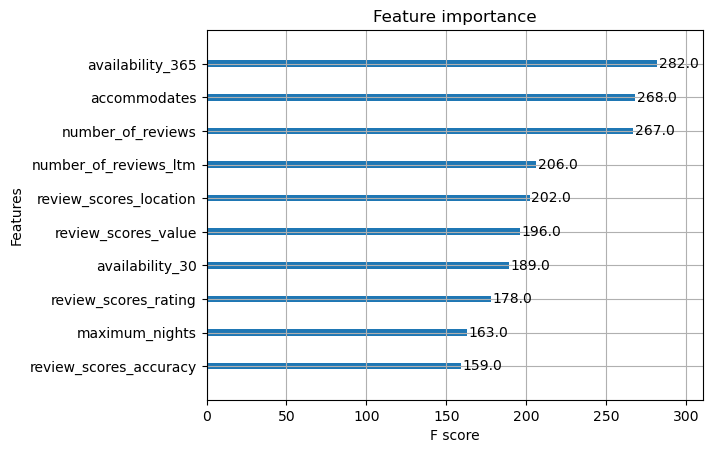

In [52]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# fit the model to the training data
xgb_model.fit(X_train, y_train)

# plot the feature importances
plot_importance(xgb_model, max_num_features=10)

# get the selected features
selected_features = xgb_model.get_booster().feature_names
print(selected_features)


Variance Thresholding Model


In [54]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a VarianceThreshold object
selector = VarianceThreshold(threshold=0.1)

# fit the selector to the training data
selector.fit(X_train)

# get the selected features and their variances
selected_features = [(feature, variance) for feature, variance in zip(features, selector.variances_) if variance >= 0.1]
print(selected_features)


[('accommodates', 4.0487914055248275), ('bathrooms', 0.3158050824711584), ('bedrooms', 0.7554583537320803), ('beds', 2.5206490170254), ('minimum_nights', 31.00574613213003), ('maximum_nights', 239320.60593797863), ('minimum_minimum_nights', 25.998387393824633), ('maximum_minimum_nights', 106.0590794508877), ('minimum_maximum_nights', 252973.9924448929), ('maximum_maximum_nights', 231892.66556183086), ('minimum_nights_avg_ntm', 44.57351537502156), ('maximum_nights_avg_ntm', 236131.96060770648), ('availability_30', 65.3258412084627), ('availability_60', 352.97481421917274), ('availability_90', 892.4080448266315), ('availability_365', 13613.791103981051), ('number_of_reviews', 11686.115826986254), ('number_of_reviews_ltm', 625.5201540387562), ('number_of_reviews_l30d', 4.433988868368518), ('review_scores_rating', 0.1004193754965677), ('review_scores_value', 0.10721641121940771), ('instant_bookable', 0.23699119953607947), ('calculated_host_listings_count', 642.524228763387), ('calculated_h

 Recursive Feature Elimination with Cross-Validation (RFECV) 

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# create a random forest regression model
rf = RandomForestRegressor(random_state=42)

# create an RFECV object with 5-fold cross-validation
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='neg_mean_squared_error')

# fit the RFECV object to the training data
rfecv.fit(X_train, y_train)

# get the selected features and their rankings
selected_features = [(feature, rank) for feature, rank in zip(features, rfecv.ranking_)]

# sort the features by rank
selected_features.sort(key=lambda x: x[1])

# print the selected features and their rankings
print(selected_features)

# plot the cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_92096/3148106451.py", line 23, in <module>
    rfecv.fit(X_train, y_train)
  File "/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py", line 747, in fit
    rfe.fit(X, y)
  File "/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py", line 299, in _fit
    estimator.fit(X[:, features], y, **fit_params)
  File "/Users/arneshsaha/miniforge3/envs/fds/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Paralle

Using Tensorflow for Lasso Regression

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# drop the price column from the DataFrame
X = quality_df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], quality_df['price'], test_size=0.2, random_state=42)

# standardize the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# define the Lasso regression model with L1 regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L1(0.01))
])

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# get the Lasso model coefficients
lasso_coef = model.get_weights()[0]

# create a dictionary of feature names and coefficients
feature_coef = dict(zip(features, lasso_coef))

# sort the features by coefficient value
sorted_features = {k: v for k, v in sorted(feature_coef.items(), key=lambda item: abs(item[1]), reverse=True)}

# print the sorted features and their coefficients
print(sorted_features)


2023-03-28 19:09:05.281612: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


{'bedrooms': array([6.9519725], dtype=float32), 'accommodates': array([6.670902], dtype=float32), 'Room type: Entire Home': array([6.4532223], dtype=float32), 'beds': array([6.3504367], dtype=float32), 'Room Type: Private Room': array([-6.330428], dtype=float32), 'bathrooms': array([5.36058], dtype=float32), 'dishwasher': array([4.03515], dtype=float32), 'tv': array([4.0300736], dtype=float32), 'dryer': array([3.850341], dtype=float32), 'Room Type: Shared Room': array([-3.495904], dtype=float32), 'crib': array([3.412782], dtype=float32), 'review_scores_location': array([3.3014138], dtype=float32), 'number_of_reviews_ltm': array([-3.2737384], dtype=float32), 'number_of_reviews_l30d': array([-3.2435856], dtype=float32), 'number_of_reviews': array([-2.9945903], dtype=float32), 'fire extinguisher': array([2.7938035], dtype=float32), 'chair': array([2.629845], dtype=float32), 'kitchen': array([2.503213], dtype=float32), 'fireplace': array([2.4376233], dtype=float32), 'availability_365': arr

Mutual Information feature selection

In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

# load the Airbnb listings data into a DataFrame
df = quality_df

# drop the price column from the DataFrame
X = df.drop('price', axis=1)

# select all other columns in the DataFrame as features
features = list(X.columns)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], df['price'], test_size=0.2, random_state=42)

# perform Mutual Information feature selection
k = 10  # number of features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
selector.fit(X_train, y_train)

# get the selected features and their scores
selected_features = [(features[i], selector.scores_[i]) for i in selector.get_support(indices=True)]

# sort the selected features by score
selected_features.sort(key=lambda x: x[1], reverse=True)

# print the selected features and their scores
print(selected_features)


[('accommodates', 0.32288645075645794), ('bedrooms', 0.2773117199846964), ('property_type_num', 0.25815418237265364), ('calculated_host_listings_count_entire_homes', 0.2546853124156283), ('Room type: Entire Home', 0.2514300575663202), ('beds', 0.24337306396018565), ('Room Type: Private Room', 0.21527945162071105), ('calculated_host_listings_count_private_rooms', 0.19901830984535174), ('bathrooms', 0.11245872318763572), ('minimum_nights_avg_ntm', 0.11235810921478162)]
